#                  <center>CASE-STUDY 2: Confused Student EEG Prediction</center>

In [ ]:
!jt -j

## 1.Introduction 
AIM: Given this EEG signal data (brain data), main aim of this case study is to predict the mental state of student specifically when he/she is in confusion state while watching online MOOC videos to increase feedback interaction.



## 2.Business Problem: -
Massive Open Online Courses (MOOC) are very popular nowadays. It has made education very easy and accessible to hundreds of students. Now students can get education at their convenience, sitting in their homes. But as we know every coin has two sides. Two major drawbacks of MOOCs compared to offline education is teacher-student interaction and student feedback based on which teacher can improve their content. To address this issue author conducted a pilot study where 10 college students watched MOOC video clips. Their brain wave data (EEG signals) were collected while they wore a headset kind of device when watching videos. Device collected EEG data, which can be later analyzed to predict the mental state of a student mainly whether he/she was confused or not. 5 video clips out of 10 contained topics which is relatively found confusing for a college student such as quantum mechanics etc. In each video random clips were chopped to make it more confusing. And other 5 were simple linear algebra topics to which college students are usually familiar with.


## 3. Mapping to ML/DL problem 
•	Given problem clearly maps to the category of supervised problems specifically to binary classification problem.


## 4. Business constraints 
- No strict latency constraints



## 5. Data Loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eeg_df = pd.read_csv('confused_eeg/EEG_data.csv')
loc_df = pd.read_csv('confused_eeg/demographic_info.csv')

In [3]:
eeg_df.shape, loc_df.shape

((12811, 15), (10, 4))

In [4]:
eeg_df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [5]:
loc_df

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [6]:
loc_df.rename(columns={'subject ID': 'SubjectID'}, inplace=True)
loc_df.columns

Index(['SubjectID', ' age', ' ethnicity', ' gender'], dtype='object')

In [7]:
df = eeg_df.merge(loc_df, on = 'SubjectID')

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [10]:
df.shape, eeg_df.shape

((12811, 18), (12811, 15))

In [11]:
df.to_csv('merged_df.csv', index=False)

## **Data Columns Understanding**

'SubjectID' – Unique id given to each of 10 students <br>
'VideoID' – unique video id <br>
'Attention' - Proprietary measure of mental focus <br>
'Mediation' - Proprietary measure of calmness <br>
'Raw' - Raw EEG signal <br>
'Delta' - 1-3 Hz of power spectrum <br>
'Theta' - 4-7 Hz of power spectrum <br>
'Alpha1' - Lower 8-11 Hz of power spectrum <br>
'Alpha2' - Higher 8-11 Hz of power spectrum <br>
'Beta1' - Lower 12-29 Hz of power spectrum <br>
Following column description are not given under data description. <br>
So, it is assumed based on other given description and taken from research paper provided. <br>
'Beta2' – Higher 12-29 Hz of power spectrum(assumed) as not given <br>
'Gamma1' – Lower 30-100 Hz of power spectrum <br>
‘Gamma2’ - Higher 30-100 Hz of power spectrum <br>
‘Age’ – Age of the subject <br>
‘Ethnicity’ - a social group that shares a common and distinctive culture, religion, language such as Han Chinese, Bengali, English. <br>
‘Gender’ – Gender of the subject, Male or Female <br>

10 videos are shown where videos from 0-4 have a predefined label of 0 i.e. not confusing and video id from 5-9 have a predefined label of 1 i.e. confusing.


### Imbalance Data Check

In [12]:
print(df['predefinedlabel'].unique())
df['predefinedlabel'].value_counts()

[0. 1.]


0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [13]:
print(df['user-definedlabeln'].unique())
df['user-definedlabeln'].value_counts()

[0. 1.]


1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

### Observation:-
- Data is almost balanced using any of the above feature as target variable

## Null-value check

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
 15  age                 12811 non-null  int64  
 16  ethn

### Data Ambiguity

### Subject 3, Video 3 has zeros for their attention and meditation values

It should be due to problems in the collection of the data. Maybe that student did not wear the device correctly somehow.

When authors publish the paper, they indeed discard one students' data. It's probably this guy.We can interpret these 0s as missing values.

In [15]:
student3_df = df[(df['SubjectID']==3) & (df['VideoID']==3)]
student3_df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
4244,3.0,3.0,0.0,0.0,394.0,1138210.0,72993.0,15945.0,14302.0,8017.0,11823.0,12661.0,2424.0,0.0,0.0,28,Han Chinese,F
4245,3.0,3.0,0.0,0.0,18.0,390160.0,152764.0,25286.0,22357.0,26841.0,206445.0,17996.0,2437.0,0.0,0.0,28,Han Chinese,F
4246,3.0,3.0,0.0,0.0,138.0,146894.0,23616.0,27213.0,4977.0,3990.0,22119.0,12406.0,571.0,0.0,0.0,28,Han Chinese,F
4247,3.0,3.0,0.0,0.0,839.0,218375.0,32740.0,5195.0,6608.0,2232.0,7497.0,3498.0,2314.0,0.0,0.0,28,Han Chinese,F
4248,3.0,3.0,0.0,0.0,-389.0,610768.0,55125.0,17737.0,9664.0,1896.0,621.0,667.0,431.0,0.0,0.0,28,Han Chinese,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,3.0,3.0,0.0,0.0,-139.0,93645.0,6896.0,3636.0,1314.0,387.0,23797.0,544.0,244.0,0.0,0.0,28,Han Chinese,F
4384,3.0,3.0,0.0,0.0,323.0,132569.0,1767.0,2127.0,1545.0,530.0,5667.0,181.0,136.0,0.0,0.0,28,Han Chinese,F
4385,3.0,3.0,0.0,0.0,-119.0,246779.0,31135.0,4987.0,15806.0,3547.0,17713.0,670.0,370.0,0.0,0.0,28,Han Chinese,F
4386,3.0,3.0,0.0,0.0,39.0,281078.0,41476.0,8966.0,8510.0,3996.0,100286.0,822.0,1508.0,0.0,0.0,28,Han Chinese,F


In [16]:
# Check whether all values for attention, mediation contains 0.
(student3_df[['Attention','Mediation']] == 0).all()

Attention    True
Mediation    True
dtype: bool

### Observation:-
- All values for Attention and Mediation columns are 0.
- But other columns contains data. So for now we would not choose to drop this students data.

## Duplicate Value Check

In [17]:
df[df.duplicated()]

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender


In [18]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

In [19]:
df.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000


## Target Variable Selection - 'predefinedlabel' OR  'user-definedlabeln' ?

### Video Confusion
- We knew 5 videos confusing and other 5 not confusing are shown to each of the students.
- First 5 videos with video id 0-4 are not confusing and 5-9 are confusing. How? Have a look below

In [20]:
df.groupby('VideoID')['predefinedlabel'].first()

VideoID
0.0    0.0
1.0    0.0
2.0    0.0
3.0    0.0
4.0    0.0
5.0    1.0
6.0    1.0
7.0    1.0
8.0    1.0
9.0    1.0
Name: predefinedlabel, dtype: float64

In [21]:
print(df[df['predefinedlabel'] == df['user-definedlabeln']].shape[0]/ df.shape[0])
print(df[df['predefinedlabel'] != df['user-definedlabeln']].shape[0]/ df.shape[0])


0.4880961673561783
0.5119038326438217


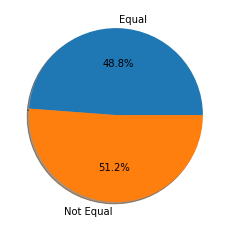

In [22]:
plt.pie([0.4880961673561783,0.5119038326438217], labels=['Equal', 'Not Equal'],autopct='%1.1f%%' ,shadow=True)
plt.show()

### Observation:-
- Above chart shows that 51% of total rows have user-defined label different from pre-defined label.

### Now accordingly lets see how students found the videos according to their level of confusion

In [23]:
# groupby student and videoid,  take the first row value of each group as all the rows will have same values( 
# for eg: if students watched one video, that much data is 120 rows then all the rows will have same label as it belongs to same video. )
print(df.groupby(['SubjectID', 'VideoID'])['user-definedlabeln'].first())
df2 = df.groupby(['SubjectID', 'VideoID'])['user-definedlabeln'].first()
df2 = df2.to_frame().reset_index()
df2

SubjectID  VideoID
0.0        0.0        0.0
           1.0        1.0
           2.0        1.0
           3.0        0.0
           4.0        0.0
                     ... 
9.0        5.0        1.0
           6.0        0.0
           7.0        0.0
           8.0        1.0
           9.0        0.0
Name: user-definedlabeln, Length: 100, dtype: float64


,SubjectID,VideoID,user-definedlabeln
0,0.0,0.0,0.0
1,0.0,1.0,1.0
2,0.0,2.0,1.0
3,0.0,3.0,0.0
4,0.0,4.0,0.0
...,...,...,...
95,9.0,5.0,1.0
96,9.0,6.0,0.0
97,9.0,7.0,0.0
98,9.0,8.0,1.0


In [24]:
# Convert above df in below format using pivot function. Here we can clearly see each student's defined confusion state for 
# each video.
# https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
student_video_df = df2.pivot(index='SubjectID',  columns='VideoID', values='user-definedlabeln')
student_video_df

VideoID,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
SubjectID,,,,,,,,,,
0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
4.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
5.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
6.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
7.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [25]:
# Summing over rows will give me information about how many videos out of 10 confused each student.
print(student_video_df.sum(axis=1)) # axis=1 for perform fucntion on row level
print("-------------------------------------------")
# Summing over columns will give me information about how many students got confused for each video.
print(student_video_df.sum(axis=0)) # axis=0 for perform fucntion on column level

SubjectID
0.0    5.0
1.0    4.0
2.0    5.0
3.0    5.0
4.0    6.0
5.0    6.0
6.0    5.0
7.0    6.0
8.0    4.0
9.0    5.0
dtype: float64
-------------------------------------------
VideoID
0.0    3.0
1.0    6.0
2.0    4.0
3.0    6.0
4.0    7.0
5.0    6.0
6.0    5.0
7.0    4.0
8.0    8.0
9.0    2.0
dtype: float64


In [26]:
student_df = student_video_df.sum(axis=1)
video_df = student_video_df.sum(axis=0)

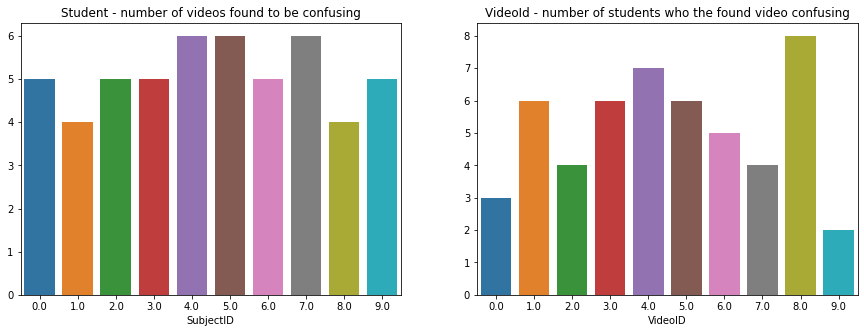

In [27]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=student_df.index, y=student_df.values ,ax=ax[0]).set_title("Student - number of videos found to be confusing")

sns.barplot(x=video_df.index, y=video_df.values, ax=ax[1]).set_title("VideoId - number of students who the found video confusing")
plt.show()


### Observations:-
- For plot 1:
    - Students 4,5 and 6 found 6 out of 10 videos confusing. (In actual only 5 were supposed to be found confusing). So these 3 students are more confused compare to others.  
    - Students with id 0,2,3,6,9 found 5 videos confusing but not necessarily(with latter videoids as it was predefined)
    - Student 1,8 found only 4 videos confusing.
    
- For plot 2:
-  As per predefined label video id 0-4 are not confusing and 5-9 are confusing.

    - Video 7,8 seems very confusing video as 7/10,8/10 students respectively found it confusing (Seems aligned with predefined label of confused)
    - Video 9 had predefined label of confused but only 2 students found it to be confusing.
    - Video 1,3 wasnt confusing but still 6 students found it confusing.
    
    
### Conclusion:-
- As we have brain data of students, user-defined label will be best choice for choosing target variable out of pre-defined label and user-defined label. Why?
- When student found any video confusing brain data will capture that signals. 

## Exploratory Data Analysis

### Univariate Analysis

In [28]:
num_df = df[['Attention', 'Mediation', 'Raw', 'Delta','Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']]

<ipython-input-29-475602bd3487>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  num_df.hist(ax=ax, bins=15) #default bins =10
C:\Users\Palak\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


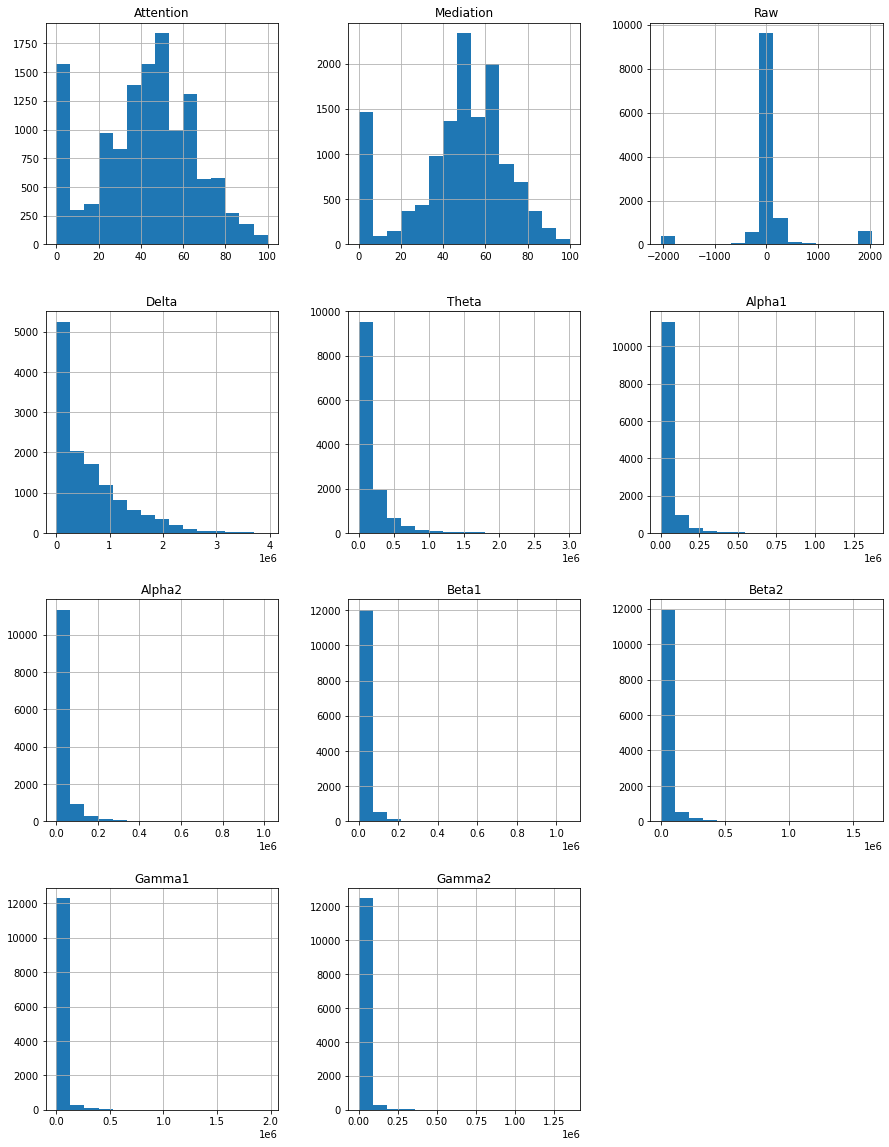

In [29]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (15,20))
ax = fig.gca()
num_df.hist(ax=ax, bins=15) #default bins =10
plt.show()

### Observations:-
- Mediation and Attention feature have same range of 0-100.
- Other features such as alpha,beta,gamma,delta,theta are in same range having slightly right skewed distribution.


In [30]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

<AxesSubplot:title={'center':'Ethnicity Distribution'}>

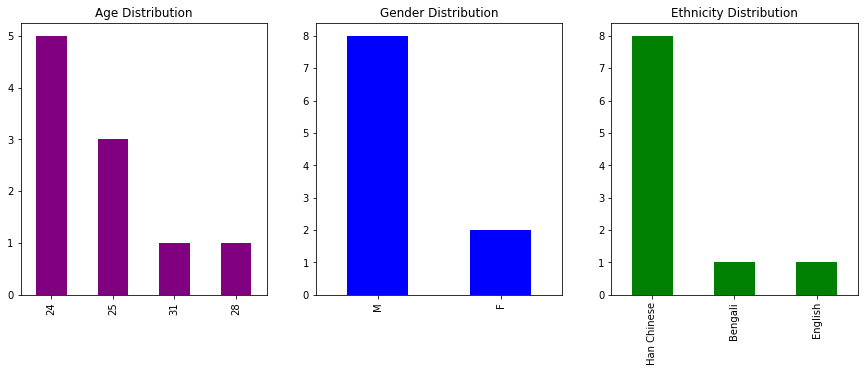

In [31]:
fig, ax =plt.subplots(1,3, figsize=(15,5))
df.groupby('SubjectID')['age'].first().value_counts().plot(kind='bar', color='purple', ax=ax[0], title="Age Distribution")
df.groupby('SubjectID')['gender'].first().value_counts().plot(kind='bar', color='blue', ax=ax[1],title="Gender Distribution")
df.groupby('SubjectID')['ethnicity'].first().value_counts().plot(kind='bar', color='green', ax=ax[2],title="Ethnicity Distribution")

### Observations:-
- Students range from 24 to 31 with half of them of age 24, three of age 25, one-one of age 28 and 31.
- 8 out of 10 students are male and 2 are female.
- Most of students are of Chinese ethnicity, only 1 Bengali and English.

In [32]:
df.columns[2:-6]

Index(['Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
       'Beta1', 'Beta2', 'Gamma1'],
      dtype='object')

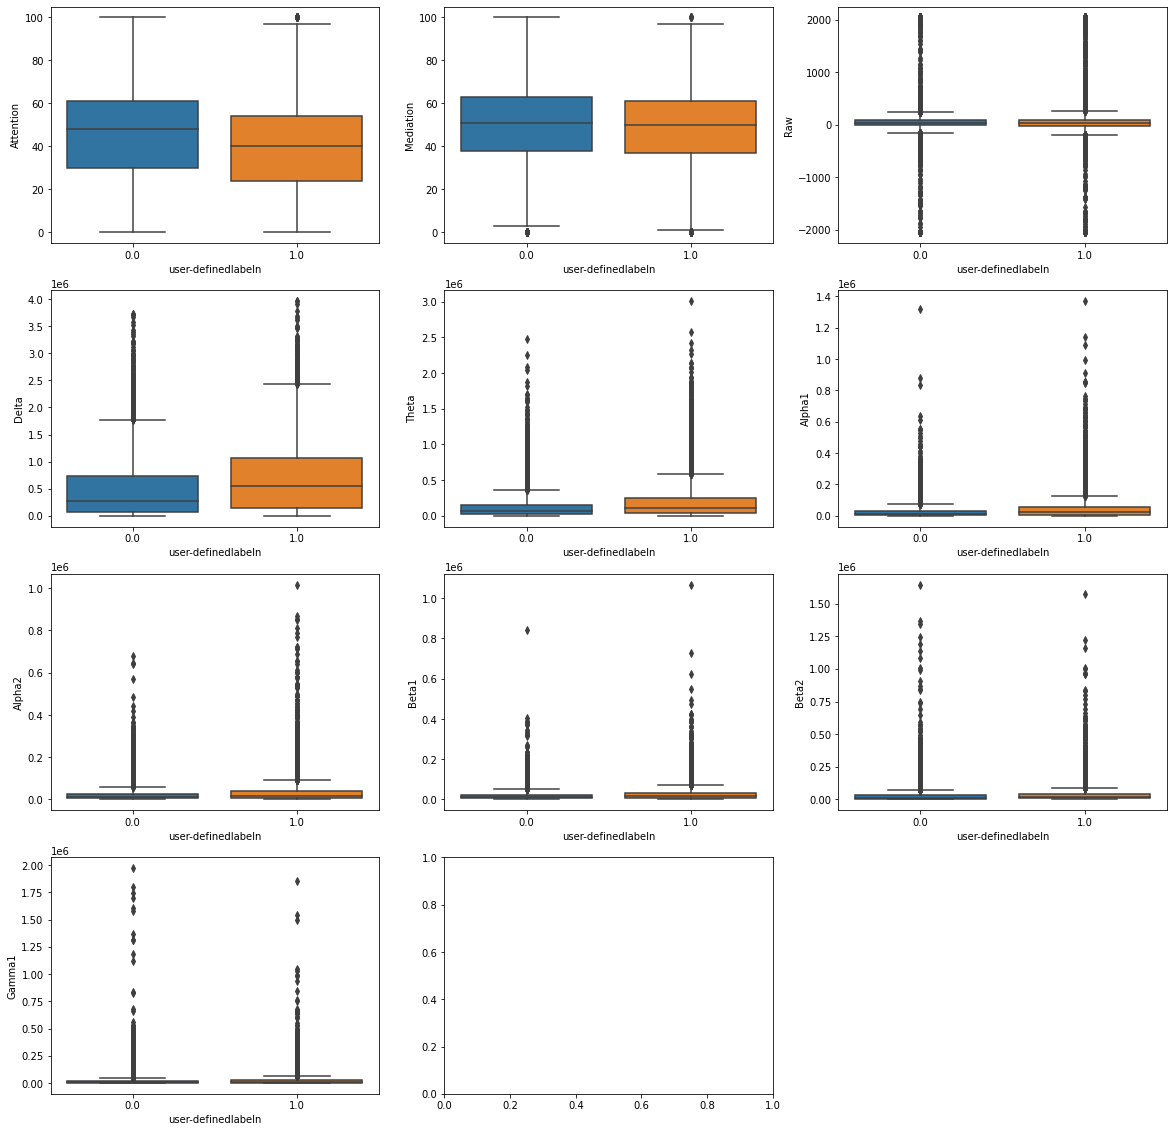

In [33]:
%matplotlib inline

fig, axes = plt.subplots(4,3,figsize=(20,20))  
for i,el in enumerate(df.columns[2:-6]):
    sns.boxplot(y=el,  x="user-definedlabeln",  data=df, ax=axes.flatten()[i])
    
fig.delaxes(axes[3,2]) # remove empty subplot

### Observations:-
- Boxplots for features Attention, delta, theta, alpha1 and alpha2 does not perfectly overlap(doesnt have same size box) which suggests individually these features contributes in distinguishing student's mental state.


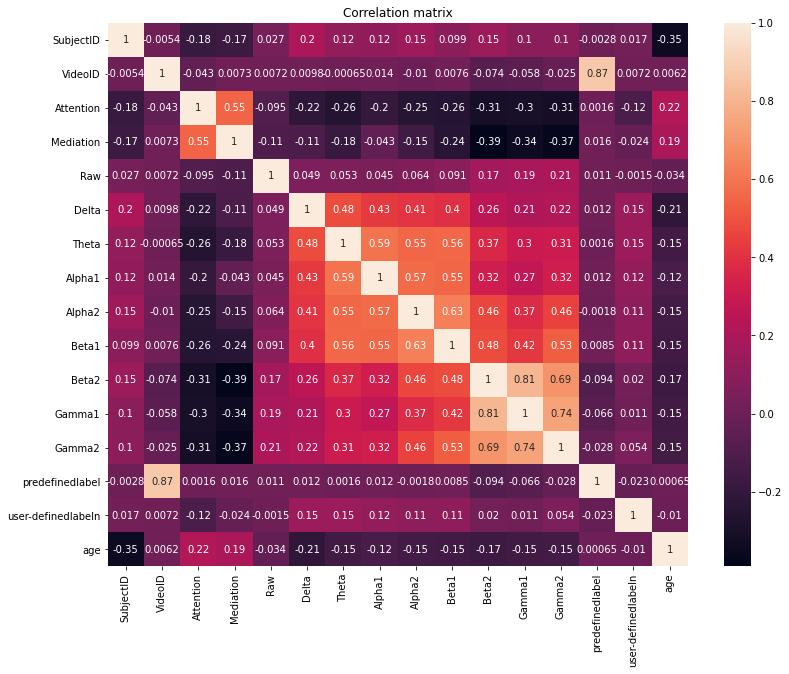

In [34]:
plt.figure(figsize = (13,10))
cor_matrix = df.corr()
sns.heatmap(cor_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### Observations:-
- If we look closely middle square portion of the plot which shows correlation between delta,theta,alpha, beta features shows high values which suggests they are highly correlated.
- In modelling part we can use this information and perform feature selection technique to see if some models perform better comparatively.

In [35]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

### Bi-variate Analysis:


<AxesSubplot:xlabel='Attention', ylabel='Mediation'>

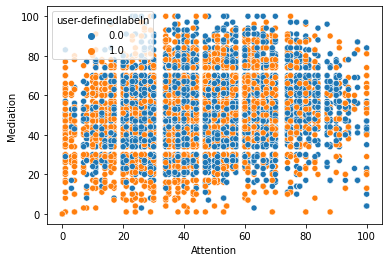

In [36]:
sns.scatterplot(x='Attention',y='Mediation',hue='user-definedlabeln', data=df)

<AxesSubplot:xlabel='Theta', ylabel='Delta'>

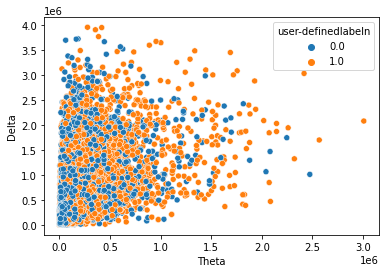

In [37]:
sns.scatterplot(x='Theta',y='Delta',hue='user-definedlabeln', data=df)

<AxesSubplot:xlabel='Theta', ylabel='Alpha1'>

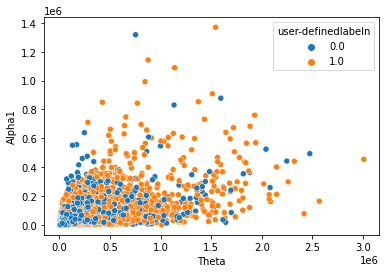

In [38]:
sns.scatterplot(x='Theta',y='Alpha1',hue='user-definedlabeln', data=df)

<AxesSubplot:xlabel='Theta', ylabel='Alpha2'>

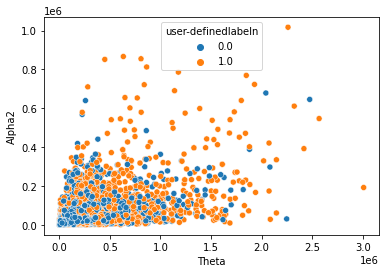

In [39]:
sns.scatterplot(x='Theta',y='Alpha2',hue='user-definedlabeln', data=df)

<AxesSubplot:xlabel='Theta', ylabel='Beta1'>

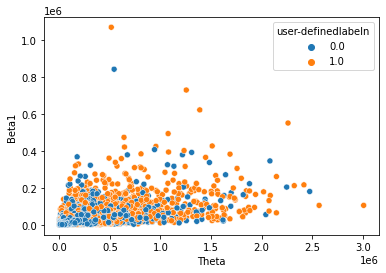

In [40]:
sns.scatterplot(x='Theta',y='Beta1',hue='user-definedlabeln', data=df)

<AxesSubplot:xlabel='Beta2', ylabel='Gamma1'>

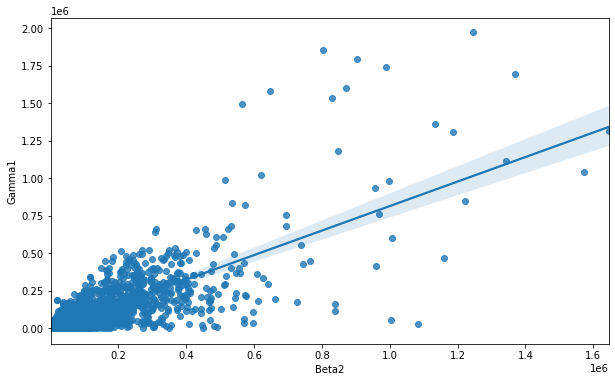

In [41]:
plt.figure(figsize=(10,6))
sns.regplot(y='Gamma1',x='Beta2', data=df)

### Observations:-
- Based on above plots, no direct relationship between feature and target variable could be identified. 

In [42]:
# hypothesis testing 
# basic kde plot - confused,not confused 
# chi-square test 

## Kde Plots

Wall time: 11.8 s


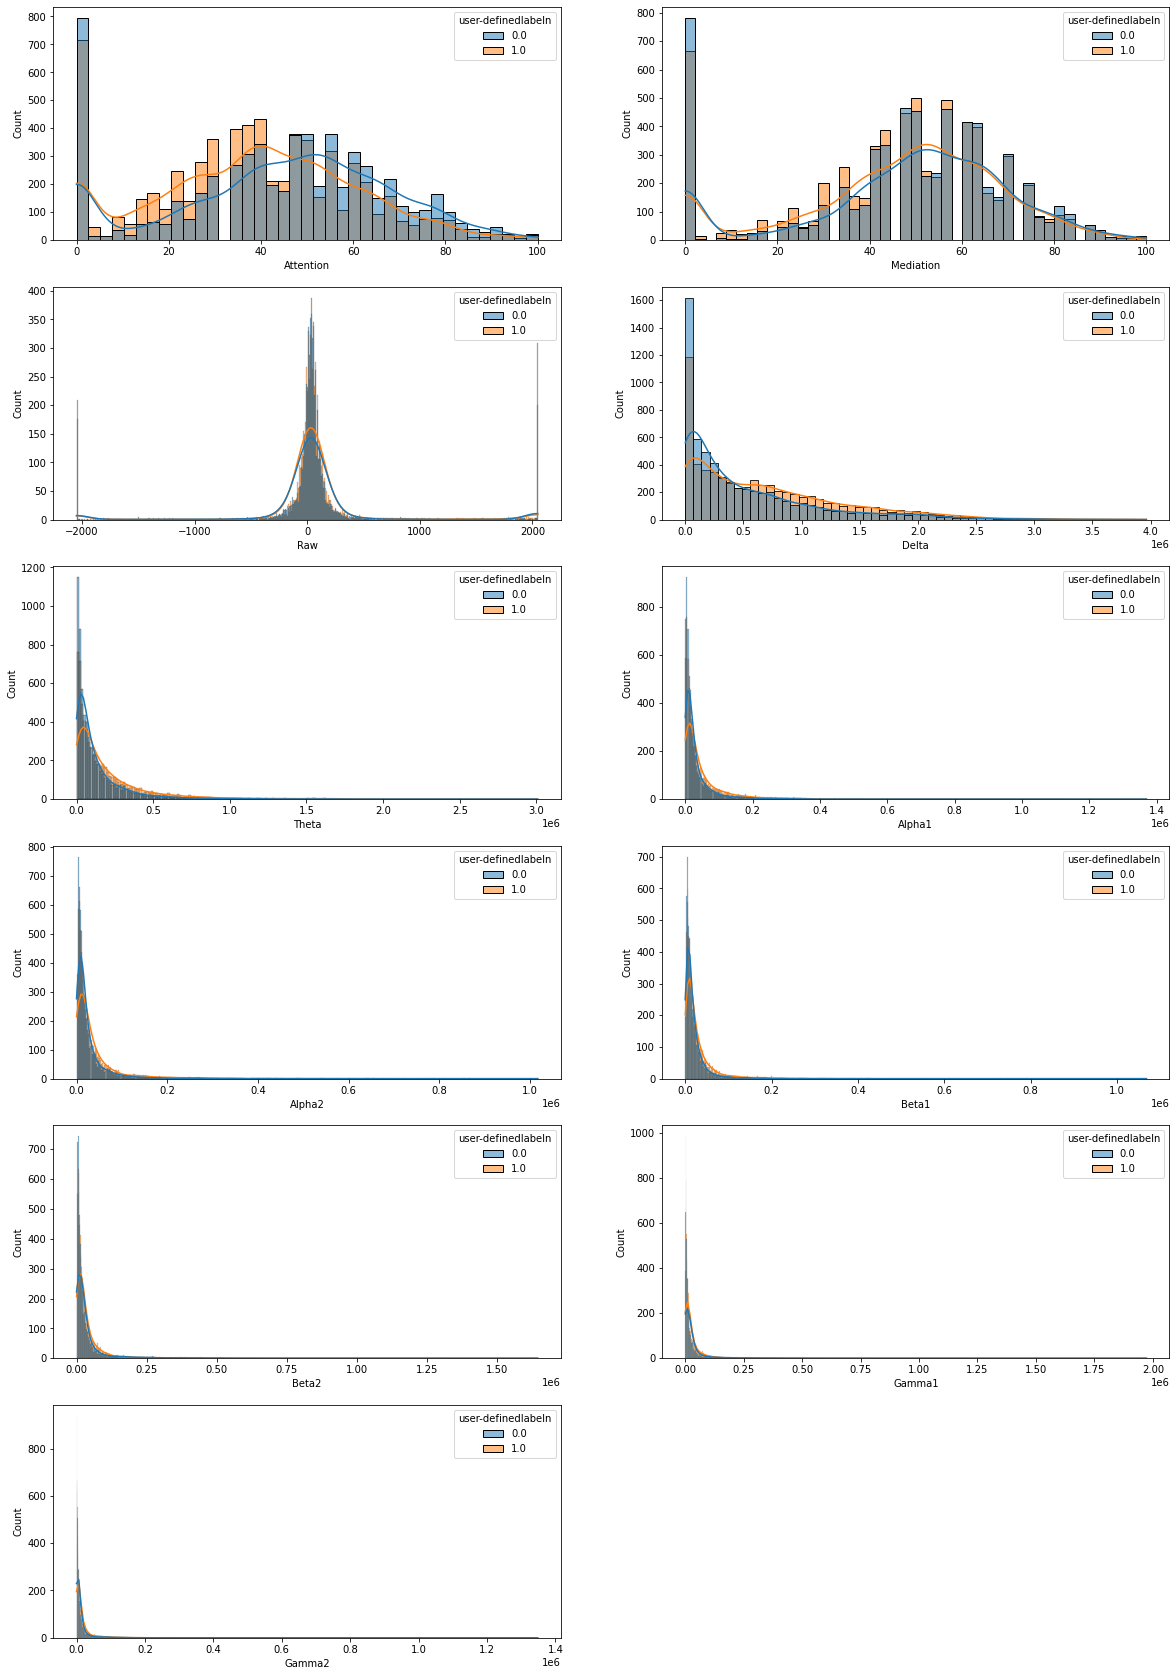

In [43]:
%%time
features = ['Attention', 'Mediation', 'Raw', 'Delta','Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

fig, axes = plt.subplots(6,2,figsize=(20,30))  
for i,col in enumerate(features):
    sns.histplot(x=col,data=df, hue='user-definedlabeln', kde=True, ax=axes.flatten()[i])

fig.delaxes(axes[5,1]) # remove empty subplot

## Hypothesis Testing using Permutation technique

In [44]:
df = pd.read_csv('merged_df.csv')

In [45]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

## Lets start with 'Raw' feature

### Create 2 separate samples
1. Student in confused state
2. Studnt not in confused state

In [47]:
df['user-definedlabeln'].value_counts(), df.columns

(1.0    6567
 0.0    6244
 Name: user-definedlabeln, dtype: int64,
 Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
        'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
        'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
       dtype='object'))

In [48]:
raw_confused_state = df[df['user-definedlabeln'] == 0 ]['Raw']
raw_not_confused_state = df[df['user-definedlabeln'] == 1 ]['Raw']

In [49]:
raw_confused_state.shape, raw_not_confused_state.shape

((6244,), (6567,))

C:\Users\Palak\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Palak\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


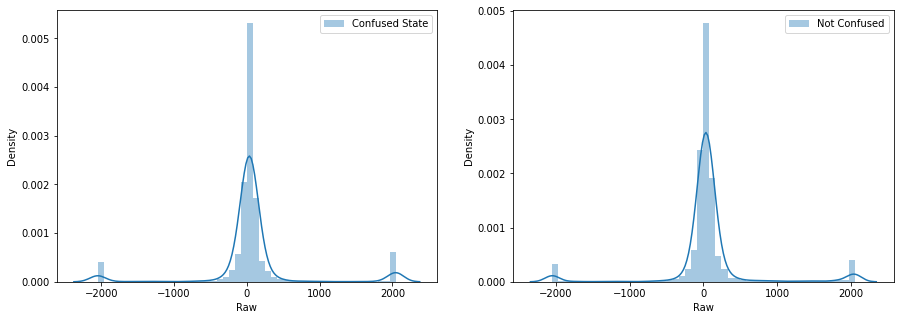

In [50]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(raw_confused_state , kde=True, label="Confused State", ax=ax[0])
ax[0].legend()

sns.distplot(raw_not_confused_state ,hist=True, kde=True,label="Not Confused", ax=ax[1])
ax[1].legend()

###  Step-1: Null Hypothesis <br>
We can compare the mean scores of both groups. <br>

- H0 = There is no difference between the two groups.<br>
- mu_confused = mu_not_confused
- mu_confused - mu_not_confused = 0

### Step-2: Alternate Hypothesis is "There is a difference between the two groups" <br>
- H1 = There is no difference between the two groups. <br>
- mu_confused != mu_not_confused
- mu_confused - mu_not_confused != 0

### Step-3: Test Statistic and Calculate the Observed Test Statistic
- T_obs = observed_group1_mean - observed_group2_mean = 1.7521645265521641

In [51]:
T_obs = raw_confused_state.mean() - raw_not_confused_state.mean()
T_obs

# T_obs value = 1.7521645265521641

1.7521645265521641

### Step-4: Simulate the distribution using the permutation test
Resampling + Permutation simulation <br>
Let's say we have n1 elements in group1 and n2 elements in the group2.

Combine the group1, group2. For each permutation data sample take first n1 elements as group1, rest n2 samples as group2.
calculate the test statistic

In [52]:
%%time
data_sample = np.concatenate([raw_confused_state, raw_not_confused_state])
n1 = len(raw_confused_state)
dist_test_stat = []
np.random.seed(85)
for i in range(1000000):
    out = np.random.permutation(data_sample) ##random permutation
    # getting test statistic i.e. mean difference between 2 randomly drawn grps
    ts_cal = out[:n1].mean() - out[n1:].mean() 
    dist_test_stat.append(ts_cal)

Wall time: 6min 19s


C:\Users\Palak\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


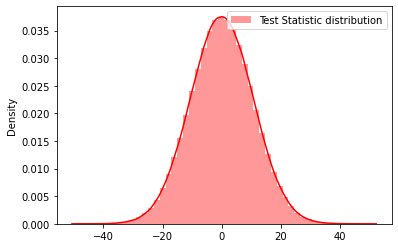

In [53]:
sns.distplot(dist_test_stat, hist=True, kde=True, color='red', norm_hist=True, label="Test Statistic distribution")
plt.legend()

In [54]:
prob = sum(np.array(dist_test_stat)>=T_obs)/1000000
prob

0.434283

One way of interpretation
prob of getting value >= T_obs is high which means in many of the randomly permuted sample mu1-mu2 value >= Tobserved
so it makes sense to interpret that there is no considerable difference in our original samples. 

In [56]:
P_value = 2*np.min([0.5, prob, 1-prob])
print('P_value', P_value)

P_value 0.868566


### Step-6: Make a Decision :-
- P-value is Probability of observing a value of test statistic>=observed value i.e 1.76 if there is no difference in test statostic of both the groups(given null hypothesis)
- For Significance Level of 5% (95% CL), P_value is very high - 0.86 so we failed to reject your accept our null hypothesis - no difference in means of both confused, not confused group.
- 'Raw' feature is not very useful in distinguishing confused and not confused state of a student.

### Let's apply another test - T-test to rest of features

In [57]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'age', 'ethnicity', 'gender'],
      dtype='object')

In [58]:
confused_state = df[df['predefinedlabel']==1]
not_confused_state = df[df['predefinedlabel']==0]

In [59]:
%%time
from scipy.stats import ttest_ind

feature_value_dict = {}
for i,col in enumerate(features):
    observed_value, p_value = ttest_ind(confused_state[col], not_confused_state[col])
    feature_value_dict[col] = p_value 
        


Wall time: 12 ms


In [60]:
feature_value_dict

{'Attention': 0.8599530220324431,
 'Mediation': 0.07463834983218523,
 'Raw': 0.2303453557165976,
 'Delta': 0.16274832809683568,
 'Theta': 0.8561083925604371,
 'Alpha1': 0.18162337254291927,
 'Alpha2': 0.8351751753405073,
 'Beta1': 0.3336225461258451,
 'Beta2': 2.780218294518879e-26,
 'Gamma1': 9.269373700304615e-14,
 'Gamma2': 0.0013038106570605983}

In [61]:
for key,value in feature_value_dict.items():
    if value <= 0.05:
        print(key, " p_value: ", value)

Beta2  p_value:  2.780218294518879e-26
Gamma1  p_value:  9.269373700304615e-14
Gamma2  p_value:  0.0013038106570605983


### Observation:-
- According to t-test 'Beta2', 'Gamma1' and 'Gamma2' seems to be important features.